##### `2022-2 빅데이터분석프로그래밍` 
## <center> 중 간 고 사 </center>

**이름**:  이지은

**학과**:    빅데이터분석학과

**학번**:   222DBG04

---

#### **`문항: 1. ~ 8.`** 다음은 대한민국 영화 중에서 관객 수가 가장 많은 상위 8개의 데이터입니다.

In [209]:
import pandas as pd
data = {
    '영화' : ['명량', '극한직업', '신과함께-죄와 벌', '국제시장', '괴물', '도둑들', '7번방의 선물', '암살'],
    '개봉연도' : [2014, 2019, 2017, 2014, 2006, 2012, 2013, 2015],
    '관객수' : [1761, 1626, 1441, 1426, 1301, 1298, 1281, 1270], # (단위 : 만 명)
    '평점' : [8.88, 9.20, 8.73, 9.16, 8.62, 7.64, 8.83, 9.10]
}
df = pd.DataFrame(data)
df

,영화,개봉연도,관객수,평점
0,명량,2014,1761,8.88
1,극한직업,2019,1626,9.20
2,신과함께-죄와 벌,2017,1441,8.73
3,국제시장,2014,1426,9.16
4,괴물,2006,1301,8.62
5,도둑들,2012,1298,7.64
6,7번방의 선물,2013,1281,8.83
7,암살,2015,1270,9.10


### 1. 전체 데이터 중에서 '영화'와 '평점' 정보만 출력하세요. (3점)

In [5]:
print(df[['영화','평점']])

          영화    평점
0         명량  8.88
1       극한직업  9.20
2  신과함께-죄와 벌  8.73
3       국제시장  9.16
4         괴물  8.62
5        도둑들  7.64
6    7번방의 선물  8.83
7         암살  9.10


### 2. 2017년 이후에 개봉한 영화들의  '영화', '개봉연도' 정보를 출력하세요. (5점)

In [16]:
a=df.query('개봉연도 >= 2017')[['영화','개봉연도']]

a

,영화,개봉연도
1,극한직업,2019
2,신과함께-죄와 벌,2017


### 3. 전체 데이터에 대해 관객수의 평균을 구해보세요. (3점)

In [22]:
import numpy as np
a=df['관객수'].mean()
a

1425.5

### 4. 2017년 이후에 개봉한 영화들의 관객수 평균을 구해보세요. (5점)

In [25]:
a1=df.query('개봉연도 >= 2017')
a2=a1['관객수'].mean() 
a2


1533.5

### 5. 아래 계산식을 사용하여 '추천점수' Column 을 df 에 추가하고, df 를 출력하세요.  (5점)

추천점수 = (관객수 * 평점) // 100

In [28]:
df['추천점수']=(df['관객수'] * df['평점']) // 100
df


,영화,개봉연도,관객수,평점,추천점수
0,명량,2014,1761,8.88,156.0
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
3,국제시장,2014,1426,9.16,130.0
4,괴물,2006,1301,8.62,112.0
5,도둑들,2012,1298,7.64,99.0
6,7번방의 선물,2013,1281,8.83,113.0
7,암살,2015,1270,9.10,115.0


### 6. 전체 데이터를 '개봉연도', '관객수', '평점'  기준 내림차순으로 출력하세요. (3점)

In [30]:
df.sort_values(['개봉연도','관객수','평점'],ascending=False)

,영화,개봉연도,관객수,평점,추천점수
1,극한직업,2019,1626,9.20,149.0
2,신과함께-죄와 벌,2017,1441,8.73,125.0
7,암살,2015,1270,9.10,115.0
0,명량,2014,1761,8.88,156.0
3,국제시장,2014,1426,9.16,130.0
6,7번방의 선물,2013,1281,8.83,113.0
5,도둑들,2012,1298,7.64,99.0
4,괴물,2006,1301,8.62,112.0


### 7. 추천 점수가 140 이상이면 '상', 120 이상이면 '중', 120 미만이면 '하' 인 값을 갖는 '등급' Column을 df 에 추가하고 df 를 출력하세요. (7점)

In [43]:
import numpy as np
df=df.assign(등급 =np.where(df['추천점수']>= 140, '상', 
                       np.where(df['추천점수']>= 120,'중',
                                '하')))
df

,영화,개봉연도,관객수,평점,추천점수,등급
0,명량,2014,1761,8.88,156.0,상
1,극한직업,2019,1626,9.20,149.0,상
2,신과함께-죄와 벌,2017,1441,8.73,125.0,중
3,국제시장,2014,1426,9.16,130.0,중
4,괴물,2006,1301,8.62,112.0,하
5,도둑들,2012,1298,7.64,99.0,하
6,7번방의 선물,2013,1281,8.83,113.0,하
7,암살,2015,1270,9.10,115.0,하


---

#### **`문항: 8. ~ 17.`** 한 프랜차이즈 식당의 주문 데이터(menu_order.csv)를 분석하려고 합니다. 변수 의미는 다음과 같습니다.
- 'order_id': 주문 번호
- 'quantity': 메뉴의 주문 수량
- 'item_name': 메뉴 이름
- 'choice_description': 메뉴의 상세 선택 옵션
- 'item_price': 메뉴의 가격*'quantity' 계산 액수 (단위: $)

### 8. 위 프랜차이즈 식당의 주문 데이터(menu_order.csv)를 다운로드하시고, order 변수에 저장한 후, 앞 10 행의 정보를 출력하세요. (3점)

In [199]:
order=pd.read_csv('./menu_order.csv')
order.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


### 9. order의 변수 속성 정보를 출력하세요. (3점)

In [163]:
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   int64  
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 180.7+ KB


### 10. order_id는 숫자의 의미를 가지지 않으므로 astype()을 사용하여 str 타입으로 변환하세요. (5점)

In [200]:
order['order_id']=order['order_id'].astype(str)
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   order_id            4622 non-null   object 
 1   quantity            4622 non-null   int64  
 2   item_name           4622 non-null   object 
 3   choice_description  3376 non-null   object 
 4   item_price          4622 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.7+ KB


### 11. order_id 와 item_name 의 고유한 개수(종류)를 출력하세요. (5점)

In [212]:
b=order['order_id'].unique()
ans2=pd.DataFrame(b)
ans2.info() #1834
a=order['item_name'].unique()
ans1=pd.DataFrame(a)
ans1.info() #50


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1834 non-null   object
dtypes: object(1)
memory usage: 14.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes


### 12. 한 번 주문시  quantity를 고려하여 가장 주문이 저조한 메뉴 10가지를 'bottom10' 변수에 저장하고 출력하세요(메뉴의 총 판매수를 나타내는 변수 이름은 'sold_quantity' 로 설정) . (7점)

In [118]:
orderb=order.dropna(subset=['quantity','order_id']).groupby('item_name').agg(sold_quantity=('quantity','count'))
orderb.reset_index(inplace=True)
bottom10=orderb.sort_values(['sold_quantity']).head(10)
bottom10

,item_name,sold_quantity
14,Carnitas Salad,1
46,Veggie Crispy Tacos,1
26,Chips and Mild Fresh Tomato Salsa,1
33,Crispy Tacos,2
7,Bowl,2
36,Salad,2
41,Steak Salad,4
47,Veggie Salad,6
15,Carnitas Salad Bowl,6
8,Burrito,6


### 13. 앞에서 만든 bottom10을 활용하여 가로축은 'sold_quantity', 세로축은 'item_name' 인 막대 그래프를 그리세요. (5점)

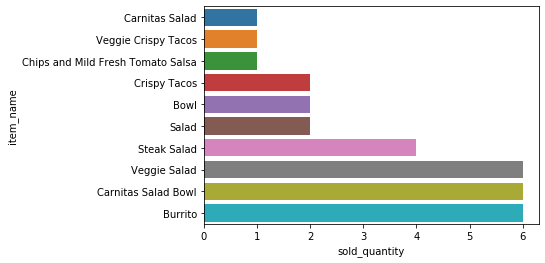

In [208]:
import seaborn as sns
sns.barplot(data=bottom10,x="sold_quantity",y="item_name")

### 14. 각 메뉴의 총 판매액을 나타내는 변수 'menu_sales'에 대한 박스 플롯을 그리세요. (10점)

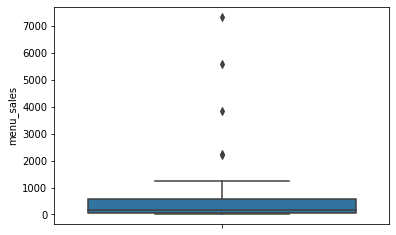

In [150]:
import seaborn as sns
sales=order.dropna(subset=['quantity','order_id']).groupby('item_name').agg(menu_sales=('item_price','sum'))

sales.reset_index(inplace=True)
sales
sns.boxplot(data=sales,y='menu_sales')

### 15. IQR(Inter Quarter Range) 기준에 의해 상위 극단치에 해당하는 메뉴들의 메뉴 이름과 판매액을 출력하세요. (10점)

In [214]:
r25=sales['menu_sales'].quantile(.25) 

r75=sales['menu_sales'].quantile(.75)
#sales=pd.DataFrame(sales)
sales.query('menu_sales >= 1.5*@r75 ')


,item_name,menu_sales
2,Barbacoa Burrito,894.75
17,Chicken Bowl,7342.73
18,Chicken Burrito,5575.82
21,Chicken Salad Bowl,1228.75
22,Chicken Soft Tacos,1108.09
25,Chips and Guacamole,2201.04
38,Steak Bowl,2260.19
39,Steak Burrito,3851.43
45,Veggie Burrito,934.77


### 16. 고객이 한 번에 평균적으로 얼마를 주문하는지 계산하세요. (10점)

In [205]:
salesper=order.dropna(subset=['quantity','order_id']).groupby('order_id').agg(tosales=('item_price','sum'))
salesper.sort_values(['tosales'])

salesper['tosales'].mean()


18.811428571428717

### 17. 가장 고액의 주문에서 어떤 아이템이 얼마나 팔렸는지 출력하세요. (10점)

In [211]:
salesper['tosales'].max()



TypeError: aggregate() missing 1 required positional argument: 'func'

---

### <center> `파일 이름 맨 끝 (이름) 부분에 자신의 이름을 넣어 rename 해주세요 :)` </center>

### <center> 수고 많으셨습니다 !! </center>